# <font color='DarkBlue'>Gradient Checking

In [1]:
# Packages
import numpy as np
import matplotlib.pyplot as plt
from gc_testCases import *
from gc_utils import sigmoid, relu, dictionary_to_vector, vector_to_dictionary, gradients_to_vector

In [2]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    
    '''
    Draw a neural network using matplotilb.
    
    Usage:
        $ fig = plt.figure(figsize=(12, 12))
        $ draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    Parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

## <font color='IndianRed'>How does gradient checking work?

Backpropagation computes the gradients $\frac{\partial J}{\partial \theta}$, where $\theta$ denotes the parameters of the model. $J$ is computed using forward propagation, and by your loss function.

Because forward propagation is relatively easy to implement, you're confident you got that right, and so you're almost  100% sure that you're computing the cost $J$ correctly. Thus, you can use your code for computing $J$ to verify the code for computing $\frac{\partial J}{\partial \theta}$. 

Let's look back at the definition of a derivative (or gradient):
$$ \frac{\partial J}{\partial \theta} = \lim_{\varepsilon \to 0} \frac{J(\theta + \varepsilon) - J(\theta - \varepsilon)}{2 \varepsilon}$$

## <font color='Indianred'>1-dimensional gradient checking

Consider a 1D linear function $J(\theta) = \theta \cdot x$. The model contains only a single real-valued parameter $\theta$, and takes $x$ as input.

You will implement code to compute $J(\cdot)$ and its derivative $\frac{\partial J}{\partial \theta}$. You will then use gradient checking to make sure your derivative computation for $J$ is correct. 


**Exercise**: implement forward propagation and backward propagation for this simple function. 

In [3]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(x, theta):
    """
    Implement the linear forward propagation (J(theta) = theta * x)
    
    Arguments:
    x -- a real-valued input
    theta -- our parameter, a real number as well
    
    Returns:
    J -- the value of function J, computed using the formula J(theta) = theta * x
    """
    
    J = np.dot(theta, x)
    return J

In [4]:
x, theta = 2, 4
J = forward_propagation(x, theta)
print ("J = " + str(J))

J = 8


**Exercise**: Now, implement the backward propagation step (derivative computation). That is, compute the derivative of $J(\theta) = \theta x$ with respect to $\theta$. You should get $d\theta = \frac { \partial J }{ \partial \theta} = x$.

In [5]:
def backward_propagation(x, theta):
    """
    Computes the derivative of J with respect to theta
    
    Arguments:
    x     -- a real-valued input
    theta -- our parameter, a real number as well
    
    Returns:
    dtheta -- the gradient of the cost with respect to theta
    """
    
    dtheta = x
    return dtheta

In [6]:
x, theta = 2, 4
dtheta = backward_propagation(x, theta)
print ("dtheta = " + str(dtheta))

dtheta = 2


**Exercise**: To show that the `backward_propagation()` function is correctly computing the gradient $\frac{\partial J}{\partial \theta}$, let's implement gradient checking.

**Instructions**:
- First compute "gradapprox" using the formula above (1) and a small value of $\varepsilon$. Here are the Steps to follow:
    1. $\theta^{+} = \theta + \varepsilon$
    2. $\theta^{-} = \theta - \varepsilon$
    3. $J^{+} = J(\theta^{+})$
    4. $J^{-} = J(\theta^{-})$
    5. $gradapprox = \frac{J^{+} - J^{-}}{2  \varepsilon}$
- Then compute the gradient using backward propagation, and store the result in a variable "grad"
- Finally, compute the relative difference between "gradapprox" and the "grad" using the following formula:
$$ difference = \frac {\mid\mid grad - gradapprox \mid\mid_2}{\mid\mid grad \mid\mid_2 + \mid\mid gradapprox \mid\mid_2}$$
You will need 3 Steps to compute this formula:
   - 1'. compute the numerator using `np.linalg.norm`
   - 2'. compute the denominator. You will need to call `np.linalg.norm` twice
   - 3'. divide
- If this difference is small (say less than $10^{-7}$), you can be quite confident that you have computed your gradient correctly. Otherwise, there may be a mistake in the gradient computation. 


In [7]:
def gradient_check(x, theta, epsilon = 1e-7):
    """
       
    Arguments:
    x     -- a real-valued input
    theta -- our parameter, a real number as well
    epsilon -- tiny shift to the input to compute approximated gradient with formula(1)
    
    Returns:
    difference -- difference (2) between the approximated gradient and the backward propagation gradient
    """
    
    thetaplus  = theta + epsilon
    thetaminus = theta - epsilon
    J_plus     = forward_propagation(x, thetaplus)
    J_minus    = forward_propagation(x, thetaminus)
    gradapprox = (J_plus - J_minus) / (2 * epsilon)
    
    # Check if gradapprox is close enough to the output of backward_propagation()
   
    grad = backward_propagation(x, theta)
    

    numerator   = np.linalg.norm(grad - gradapprox)
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)
    difference  = numerator/denominator
        
    if difference < 1e-7:
        print ("Pass")
    else:
        print ("Failed")
    
    return difference

In [8]:
x, theta = 2, 4
difference = gradient_check(x, theta)
print("difference = " + str(difference))

Pass
difference = 2.91933588329e-10


Now, in the more general case, your cost function $J$ has more than a single 1D input. When you are training a neural network, $\theta$ actually consists of multiple matrices $W^{[l]}$ and biases $b^{[l]}$! It is important to know how to do a gradient check with higher-dimensional inputs.

## <font color='Indianred'> N-dimensional gradient checking

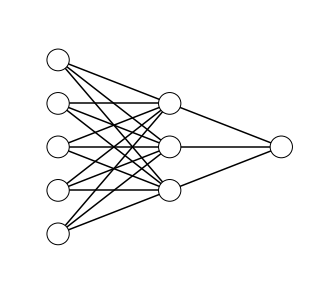

In [9]:
fig = plt.figure(figsize=(5, 5))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [5,3,1])

**LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID**

In [10]:
def forward_propagation_n(X, Y, parameters):
    """
    Implements the forward propagation (and computes the cost) presented in Figure 3.
    
    Arguments:
    X -- training set for m examples
    Y -- labels for m examples 
    parameters  -- python dictionary containing your parameters
                    W1 -- weight matrix of shape (5, 4)
                    b1 -- bias vector of shape (5, 1)
                    W2 -- weight matrix of shape (3, 5)
                    b2 -- bias vector of shape (3, 1)
                    W3 -- weight matrix of shape (1, 3)
                    b3 -- bias vector of shape (1, 1)
    
    Returns:
    cost -- the cost function (logistic cost for one example)
    """
    
    # retrieve parameters
    m  = X.shape[1]
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    # Cost
    logprobs = np.multiply(-np.log(A3),Y) + np.multiply(-np.log(1 - A3), 1 - Y)
    cost = 1./m * np.sum(logprobs)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
    return cost, cache

In [11]:
def backward_propagation_n(X, Y, cache):
    """
    Implement the backward propagation presented in figure 2.
    
    Arguments:
    X -- input datapoint, of shape (input size, 1)
    Y -- true "label"
    cache -- cache output from forward_propagation_n()
    
    Returns:
    gradients -- A dictionary with the gradients of the cost w.r.t each parameter, 
    activation and pre-activation variables.
    """
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

**How does gradient checking work?**.

The formula is still:

$$ \frac{\partial J}{\partial \theta} = \lim_{\varepsilon \to 0} \frac{J(\theta + \varepsilon) - J(\theta - \varepsilon)}{2 \varepsilon} \tag{1}$$

However, $\theta$ is not a scalar anymore. It is a dictionary called `parameters`. We implemented a function `dictionary_to_vector()` for you. It converts the parameters dictionary into a vector called `values`, obtained by reshaping all parameters (W1, b1, W2, b2, W3, b3) into vectors and concatenating them. The inverse function is `vector_to_dictionary` which outputs back the parameters dictionary. We have also converted the `gradients` dictionary into a vector `grad` using `gradients_to_vector()`.

**Exercise**: Implement `gradient_check_n()`.

**Instructions**: Here is pseudo-code that will help you implement the gradient check.

For each i in num_parameters:
- To compute `J_plus[i]`:
    1. Set $\theta^{+}$ to `np.copy(parameters_values)`
    2. Set $\theta^{+}_i$ to $\theta^{+}_i + \varepsilon$
    3. Calculate $J^{+}_i$ using to `forward_propagation_n(x, y, vector_to_dictionary(`$\theta^{+}$ `))`.     
- To compute `J_minus[i]`: do the same thing with $\theta^{-}$
- Compute $gradapprox[i] = \frac{J^{+}_i - J^{-}_i}{2 \varepsilon}$

Thus, you get a vector gradapprox, where `gradapprox[i]` is an approximation of the gradient with respect to `parameter_values[i]`. You can now compare this gradapprox vector to the gradients vector from backpropagation. 

Just like for the 1D case, compute: 
$$ difference = \frac {\| grad - gradapprox \|_2}{\| grad \|_2 + \| gradapprox \|_2 }$$

In [12]:
def gradient_check_n(parameters, gradients, X, Y, epsilon = 1e-7):
    """
    Checks if backward_propagation_n computes correctly the gradient of the cost output 
    by forward_propagation_n
    
    Arguments:
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
    grad -- output of backward_propagation_n, contains gradients of the cost with respect to the parameters. 
    x -- input datapoint, of shape (input size, 1)
    y -- true "label"
    epsilon -- tiny shift to the input to compute approximated gradient with formula(1)
    
    Returns:
    difference -- difference (2) between the approximated gradient and the backward propagation gradient
    """
    
    # Set-up variables
    parameters_values, _ = dictionary_to_vector(parameters)
    grad = gradients_to_vector(gradients)
    num_parameters = parameters_values.shape[0]
    J_plus = np.zeros((num_parameters, 1))
    J_minus = np.zeros((num_parameters, 1))
    gradapprox = np.zeros((num_parameters, 1))
    
    # Compute gradapprox
    for i in range(num_parameters):
        
        # Compute J_plus[i]. Inputs: "parameters_values, epsilon". Output = "J_plus[i]".
        # "_" is used because the function you have to outputs two parameters but we only care 
        # about the first one
        
        
        thetaplus       = np.copy(parameters_values)
        thetaplus[i][0] = thetaplus[i][0] + epsilon
        J_plus[i], _    = forward_propagation_n(X, Y, vector_to_dictionary(thetaplus))
        
        
        # Compute J_minus[i]. Inputs: "parameters_values, epsilon". Output = "J_minus[i]".
        
        thetaminus       = np.copy(parameters_values)
        thetaminus[i][0] = thetaminus[i][0] - epsilon        
        J_minus[i], _    = forward_propagation_n(X, Y, vector_to_dictionary(thetaminus))
        
        
        # Compute gradapprox[i]
        gradapprox[i] = J_plus[i] - J_minus[i]/ (2 * epsilon)
        
    
    # Compare gradapprox to backward propagation gradients by computing difference.
    
    numerator   = np.linalg.norm(grad - gradapprox)
    denominator = np.linalg.norm(grad) + np.linalg.norm(gradapprox)         
    difference  = numerator / denominator                                          
    

    if difference > 2e-7:
        print ("failed! difference = " + str(difference))
    else:
        print ("passed! difference = " + str(difference))
    
    return difference

In [13]:
X, Y, parameters = gradient_check_n_test_case()

cost, cache = forward_propagation_n(X, Y, parameters)
gradients = backward_propagation_n(X, Y, cache)
difference = gradient_check_n(parameters, gradients, X, Y)

failed! difference = 0.999999961478


It seems that there were errors in the `backward_propagation_n` code we gave you! Good that you've implemented the gradient check. Go back to `backward_propagation` and try to find/correct the errors *(Hint: check dW2 and db1)*. Rerun the gradient check when you think you've fixed it. Remember you'll need to re-execute the cell defining `backward_propagation_n()` if you modify the code. 



**Note** 
- Gradient Checking is slow! Approximating the gradient with $\frac{\partial J}{\partial \theta} \approx  \frac{J(\theta + \varepsilon) - J(\theta - \varepsilon)}{2 \varepsilon}$ is computationally costly. For this reason, we don't run gradient checking at every iteration during training. Just a few times to check if the gradient is correct. 

- Gradient Checking, at least as we've presented it, doesn't work with dropout. You would usually run the gradient check algorithm without dropout to make sure your backprop is correct, then add dropout. 